In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing


In [2]:
data=pd.read_csv("googleplaystore.csv")
data.isnull().sum()


Rating            1474
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [3]:
data.isnull().sum()
#Checking null values in the data.



Rating            1474
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [4]:
data['Rating'].fillna('0',inplace = True)


In [5]:
data.isnull().sum()


Rating            0
App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [6]:
data.dtypes


Rating            object
App               object
Category          object
Reviews            int64
Size              object
Installs          object
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object

In [7]:
#data['Size'] = data['Size'].str.replace('M','').astype('float')
indexNames = data[ data['Size'] == 'Varies with device' ].index
data.drop(indexNames , inplace=True)
data.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [8]:
data['Size']=data['Size'].str[:-1]
data['Size'] = data['Size'].astype(float)
data.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19.0,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [9]:
data.dtypes


Rating             object
App                object
Category           object
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [10]:
#Delete ',' and '+' from de column
data['Installs'] = data['Installs'].replace({',': ''}, regex=True)
data['Installs']=data['Installs'].str[:-1]

#convert to numeric
data['Installs']= pd.to_numeric(data['Installs'])

data.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19.0,10000,Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7,5000000,Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25.0,50000000,Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [11]:
#we change that to date type
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

In [12]:
data['Rating'] = data['Rating'].astype('float')

In [13]:
data.dtypes


Rating                   float64
App                       object
Category                  object
Reviews                    int64
Size                     float64
Installs                   int64
Type                      object
Price                     object
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [14]:
data.isnull().sum()

Rating            0
App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [15]:
data.Rating.max()
#Rating need to be beetween 0 to 5 .

5.0

In [35]:
data.Price.value_counts()

0          8421
0.99        145
2.99        114
1.99         66
4.99         65
           ... 
389.99        1
1.96          1
400.00        1
4.84          1
394.99        1
Name: Price, Length: 87, dtype: int64

In [36]:
data['Price'] = data['Price'].str.replace('$', '')
data.Price.value_counts()


0          8421
0.99        145
2.99        114
1.99         66
4.99         65
           ... 
389.99        1
1.96          1
400.00        1
4.84          1
394.99        1
Name: Price, Length: 87, dtype: int64

In [55]:
data['Price']=pd.to_numeric(data['Price'])

In [56]:
data.dtypes

Rating                   float64
App                       object
Category                  object
Reviews                    int64
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [37]:

print ('In total there are '+(str(len(data.App.unique())))+ ' apps in '+ (str(len(data.Category.unique())))+ ' different categories')

In total there are 8434 apps in 33 different categories


# First conclusion
## 1. How many different genres are there?
## 2. How many different apps are there across categories?
## 3. How many different paid apps are there per content rating?
## 4. Which category has had the most installs?
## 5. Which category has had most reviews and how many of them were free and paid?

In [38]:
#Category = data.groupby(['Category'])['App'].count().copy()
#Category = Category.sort_values(by=('App'), ascending=False)
#Category.set_index('Category', inplace= True)
#Category.head(50)
Category = data.groupby(['Category'])['App'].count().reset_index().rename(columns={'App':'Count of Apps'})
Category = Category.sort_values(by=['Count of Apps'], ascending=False)
Category.set_index('Category', inplace= True)
Category.head()

,Count of Apps
Category,
FAMILY,1832
GAME,1015
TOOLS,739
MEDICAL,434
BUSINESS,400


###### we found that the category with the most apps are Family

In [39]:
# מסקנה 1 : מתוך 33 קטגוריות אנו נמליץ למפתח אפליקציה שיכיר את הנתותנים ובכך יוכל לבחור את סוג האפליקציה שאותה ירצה לפתח , נמליץ לו שאפליקציות מסוג משפחה , משחקים ורפואה ההצע שם גדול והתחרות קשה יותר וסיכוייו להצלחה קטנים יותר . 

In [40]:
data.sort_values(by="Installs",ascending=False)
data.dtypes

Rating                   float64
App                       object
Category                  object
Reviews                    int64
Size                     float64
Installs                   int64
Type                      object
Price                     object
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [41]:
## להציג רגף שמתאר את ות האפליקציות

In [42]:
Installs_Cat = data.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()
Installs_Cat.head()

,Category,Installs
0,GAME,29874564253
1,FAMILY,6798793425
2,COMMUNICATION,4941943051
3,NEWS_AND_MAGAZINES,4252005650
4,TOOLS,3527094815


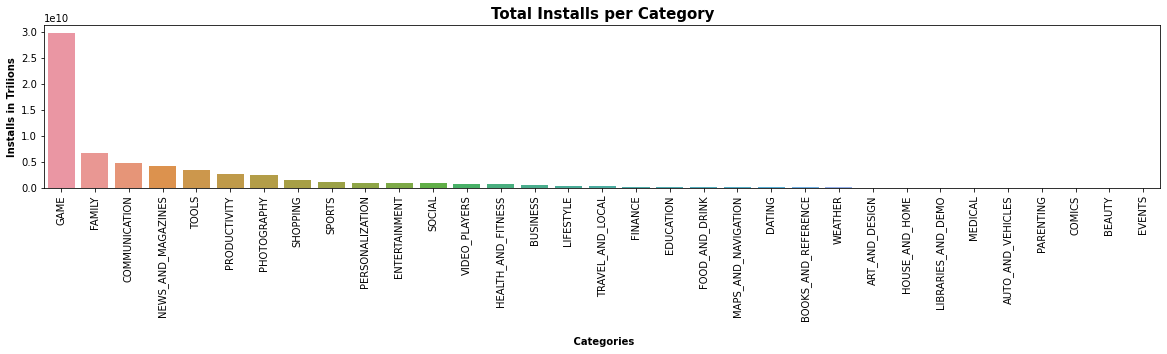

In [43]:
fig4, ax = plt.subplots(figsize =(20,3))
sns.barplot(x=Installs_Cat['Category'], y=Installs_Cat['Installs'])
plt.xlabel('\n Categories', fontsize = 10, fontweight = 'bold')
plt.ylabel('Installs in Trilions', fontsize = 10, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.title('Total Installs per Category', fontsize = 15, fontweight = 'bold')
plt.savefig('Total Installs per Category.png')
plt.show()


## מצאנו כי קטגוריית הגימיניג היא המובילה מבחינת התקנות בניגוד לחשיבה האינטואטיבית שלנו בהתחלה

# מסקנה 2

In [44]:
data_free=data[data['Type']=="Free"]
data_free.tail()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10834,0.0,FR Forms,BUSINESS,0,9.6,10,Free,0,Everyone,Business,2016-09-29,1.1.5,4.0 and up
10835,4.5,Sya9a Maroc - FR,FAMILY,38,53.0,5000,Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up
10836,5.0,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6,100,Free,0,Everyone,Education,2018-07-06,1,4.1 and up
10837,0.0,Parkinson Exercices FR,MEDICAL,3,9.5,1000,Free,0,Everyone,Medical,2017-01-20,1,2.2 and up
10839,4.5,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,398307,19.0,10000000,Free,0,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device


In [45]:
data_cut = data_free.groupby(['Category'])[['Rating','Size','Installs','Reviews']].median().sort_values('Installs', ascending = False)
data_cut.head()

,Rating,Size,Installs,Reviews
Category,,,,
GAME,4.3,43.0,5000000.0,55666.0
EDUCATION,4.4,18.0,1000000.0,22251.0
SHOPPING,4.2,15.0,1000000.0,10355.0
PHOTOGRAPHY,4.2,11.0,1000000.0,26252.0
ENTERTAINMENT,4.2,19.0,1000000.0,35279.0


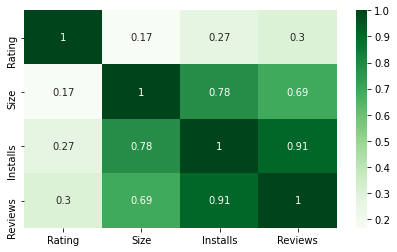

In [46]:
plt.figure(figsize=(7,4)) 
sns.heatmap(data_cut.corr(),annot=True,cmap='Greens') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [47]:
data_cut2 = data_free.groupby(['Category'])[['Reviews','Installs']].sum().sort_values('Installs', ascending = False)
data_cut2.head()

,Reviews,Installs
Category,,
GAME,1348659399,29853664290
FAMILY,289827337,6787948661
COMMUNICATION,117091580,4941694001
NEWS_AND_MAGAZINES,9848055,4252000150
TOOLS,105189921,3526648474


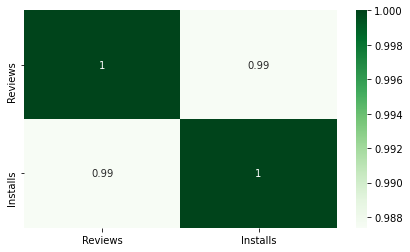

In [48]:
plt.figure(figsize=(7,4)) 
sns.heatmap(data_cut2.corr(),annot=True,cmap='Greens') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [49]:
# אפשר לראות שקיים קשר בין כמוצ

# מסקנה 3

In [50]:
data_paid=data[data['Type']=="Paid"]
data_paid.tail()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10734,0.0,FP VoiceBot,FAMILY,17,157.0,100,Paid,0.99,Mature 17+,Entertainment,2015-11-25,1.2,2.1 and up
10759,4.4,Fast Tract Diet,HEALTH_AND_FITNESS,35,2.4,1000,Paid,7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up
10781,3.8,Trine 2: Complete Story,GAME,252,11.0,10000,Paid,16.99,Teen,Action,2015-02-27,2.22,5.0 and up
10784,4.2,"sugar, sugar",FAMILY,1405,9.5,10000,Paid,1.20,Everyone,Puzzle,2018-06-05,2.7,2.3 and up
10797,0.0,Word Search Tab 1 FR,FAMILY,0,1020.0,50,Paid,1.04,Everyone,Puzzle,2012-02-06,1.1,3.0 and up


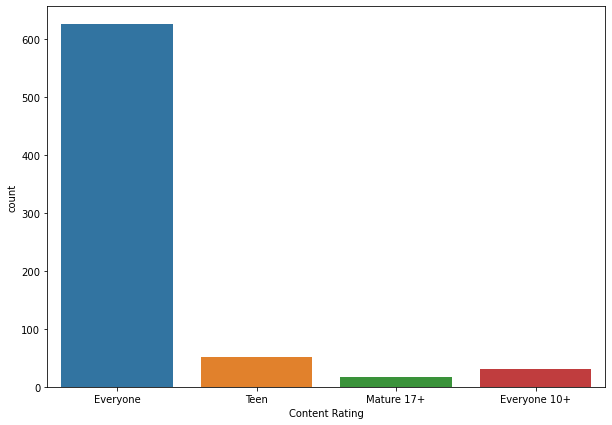

In [51]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x = 'Content Rating', data=data_paid)

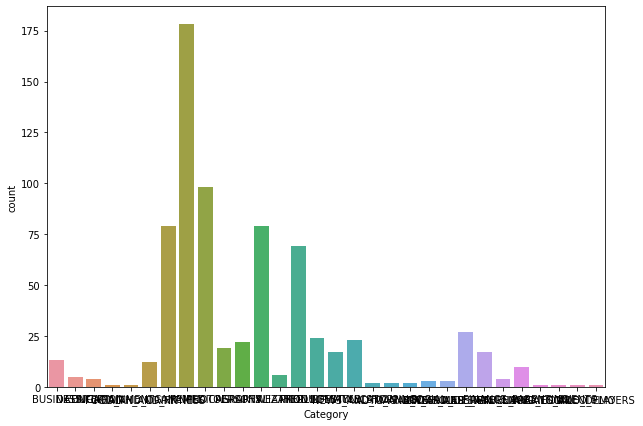

In [74]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x = 'Category', data=data_paid)

Text(0, 0.5, 'Number of Apps')

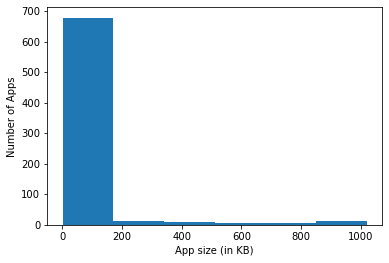

In [65]:
data_paid['Size'].plot.hist(bins=6,rwidth=2)
plt.xlabel('App size (in KB)')
plt.ylabel('Number of Apps')

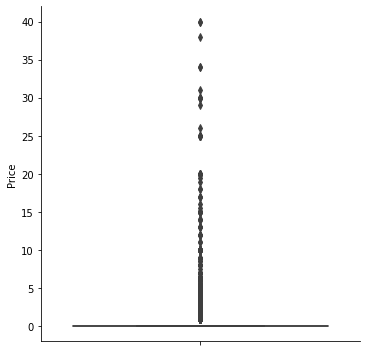

In [62]:
indexNames = data[data['Price'] >= 200].index
data.drop(indexNames , inplace=True)
sns.catplot(y='Price', data=data, kind='box')

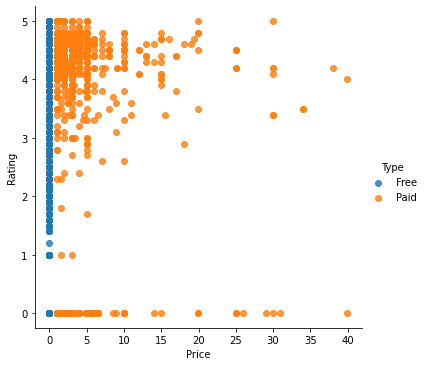

In [71]:
sns.lmplot(x="Price",y="Rating",hue='Type',data=data,fit_reg=False)